## Gridrec with APS data

Here is a basic example on how to use tomoPy

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Imports all you need:

In [16]:
import tomopy
import dxchange
import matplotlib.pyplot as plt

In [3]:
fname = '../../../tomopy/data/tooth.h5'

Select the sinogram range to reconstruct.

In [4]:
start = 0
end = 2

Read the APS 32-ID raw data.

In [5]:
proj, flat, dark = dxchange.read_aps_32id(fname, sino=(start, end))

In [6]:
print proj.shape

(181, 2, 640)


Plot the sinogram.

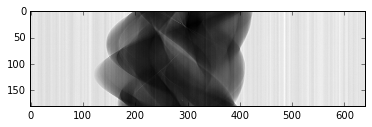

In [7]:
plt.imshow(proj[:, 0, :], cmap='Greys_r')
plt.show()

Set data collection angles as equally spaced between 0-180 degrees.

In [8]:
theta = tomopy.angles(proj.shape[0])

Flat-field correction of raw data:
$$ \frac{proj - dark} {flat - dark} $$


In [9]:
proj = tomopy.normalize(proj, flat, dark)

Find rotation center.

In [10]:
rot_center = tomopy.find_center(proj, theta, init=290, ind=0, tol=0.5)

Calculate $$ -log(proj) $$

In [11]:
tomopy.minus_log(proj)

Reconstruct object using Gridrec algorithm.

In [12]:
rec = tomopy.recon(proj, theta, center=rot_center, algorithm='gridrec')

Mask each reconstructed slice with a circle.

In [13]:
rec = tomopy.circ_mask(rec, axis=0, ratio=0.95)

(2, 640, 640)


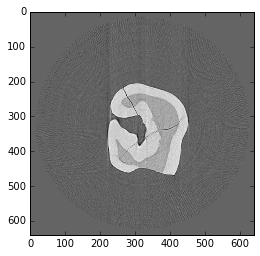

In [14]:
print rec.shape
plt.imshow(rec[0, :,:], cmap='Greys_r')
plt.show()